# Portfolio_Assets_Allocation_and_Statistical_Data_Analysis

# 📊 Portfolio Assets Allocation and Statistical Data Analysis

## ✅ Objectives
- Analyze historical stock price data of selected assets.
- Calculate key portfolio performance metrics.
- Examine correlations and diversification benefits.
- Assess risk-adjusted returns using the Sharpe ratio.

---

## 📁 Assets Analyzed
- **Tech Stocks:** AAPL, AMZN, GOOG, TSLA, IBM  
- **Others:** MGM, BA, T  
- **Benchmark:** S&P 500

---

## 📈 Key Steps Performed

1. **Data Collection**
   - A pre-compiled dataset was used, containing historical adjusted closing prices for the following assets:
   - AAPL, AMZN, GOOG, TSLA, IBM, BA, MGM, T, and the S&P 500 index (sp500)

2. **Return Calculations**
   - Computed daily and cumulative returns.
   - Normalized price series for comparison.

3. **Portfolio Metrics**
   - **Cumulative Return:** `725.67%`
   - **Annualized Volatility:** `23.01%`
   - **Sharpe Ratio:** `1.19`

4. **Covariance and Correlation Analysis**
   - Plotted correlation heatmap.
   - Identified asset pairs with strong and weak correlations.

---

## 🔍 Diversification Insights

| Asset Pair     | Correlation | Insight |
|----------------|-------------|---------|
| **AAPL-AMZN**  | 0.94        | Two tech stocks with strong co-movement. Minimal diversification. |
| **AAPL-GOOG**  | 0.91        | Strong tech-to-tech correlation. Driven by market forces. |
| **AMZN-GOOG**  | 0.96        | Strongest correlation. Owning both adds little diversification. |
| **AAPL-SP500** | 0.89        | AAPL tracks the S&P 500. Reasonable given its heavy weight. |
| **GOOG-SP500** | 0.98        | Very tightly coupled. GOOG behaves like the index itself. |

---

## 📌 Conclusion

- The portfolio grew **7.25×** over the analysis period.
- **Moderate volatility** with a **Sharpe ratio > 1** indicates strong risk-adjusted performance.
- Tech stocks are **highly correlated**, reducing diversification benefits.
- Including **low-correlation assets** like T or IBM may improve risk-adjusted returns.

In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
stock_df = pd.read_csv('stock_asset_allocation.csv')

stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
stock_df = stock_df.sort_values(by = ['Date'])

stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
stock_df.shape

(2159, 10)

In [8]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [10]:
stock_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [6]:
# Function to normalize stock prices based on their initial price

def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
    return x

In [11]:
normalize(stock_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [12]:
# Function to plot interactive plots using Plotly Express

def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i] , name = i)
    fig.show()

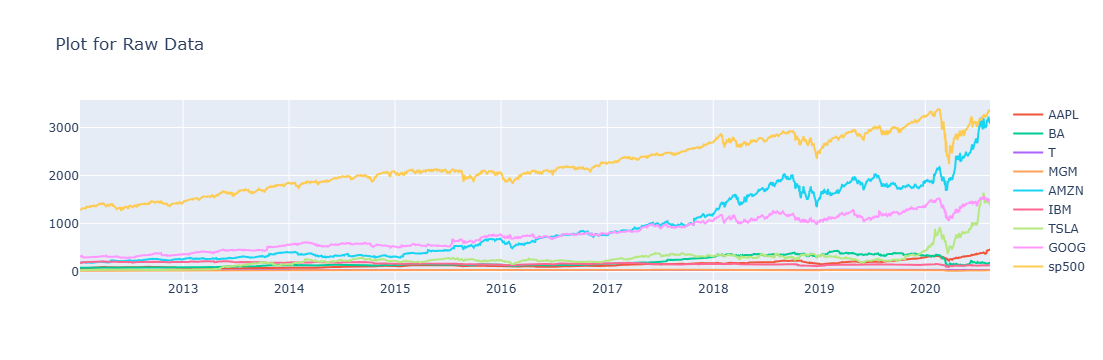

In [14]:
interactive_plot(stock_df, "Plot for Raw Data")

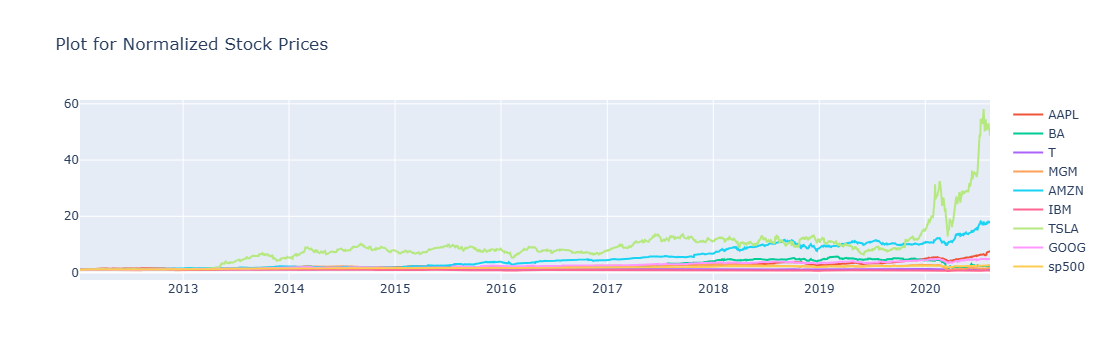

In [15]:
interactive_plot(normalize(stock_df), "Plot for Normalized Stock Prices")

# TASK: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

The **np.random.seed()** function in NumPy is used to set the seed for NumPy's random number generator, which ensures that your results are reproducible.

🔹 Why Use **np.random.seed()**?


When you generate random numbers, you usually want different results each time. But for debugging, testing, or presenting results, you may want the same sequence of random numbers every time. That’s what the seed is for.

In [16]:
#Create random weights for stocks and normalize them

np.random.seed(101)

weights = np.array(np.random.random(9))

normalized_weights = weights / np.sum(weights)

normalized_weights

array([0.10921307, 0.12069041, 0.00602201, 0.03627509, 0.14492913,
       0.17636073, 0.06492024, 0.1889901 , 0.15259921])

In [18]:
df_portfolio = normalize(stock_df)

df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


# Enumerate Function

In [19]:
for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] *normalized_weights[counter]*1000000

In [20]:
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,109213.072967,120690.407490,6022.010143,36275.090893,1.449291e+05,176360.729910,6.492024e+04,188990.104235,152599.209597
1,2012-01-13,108803.583155,119235.914699,6012.013247,36933.006803,1.469804e+05,175002.982837,5.237283e+04,187594.381427,151844.160487
2,2012-01-17,110070.940263,120258.850187,6048.001354,36633.954117,1.496495e+05,175823.488543,6.112844e+04,188671.942595,152383.655881
3,2012-01-18,111213.896735,119971.149581,6063.996069,38069.407013,1.560585e+05,176868.668340,6.161103e+04,189971.620676,154076.322712
4,2012-01-19,110861.418590,120770.317932,6081.990122,38278.743893,1.601857e+05,176331.426972,6.149613e+04,191970.659033,154837.252810
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,798707.600095,278558.118654,5968.027783,50001.606220,2.640267e+06,122539.200612,3.412668e+06,887941.003611,391983.847760
2155,2020-08-06,826573.895966,275233.575119,5966.028443,55205.122968,2.656718e+06,123193.660569,3.423147e+06,903902.858806,394503.400529
2156,2020-08-07,806327.319584,271749.212299,6002.016551,56909.729263,2.609318e+06,122060.571958,3.338417e+06,900522.495854,394753.132817
2157,2020-08-10,818047.125846,286757.593922,6038.004858,64744.906663,2.593418e+06,124160.687803,3.259961e+06,901492.611827,395835.632149


In [21]:
# Let's create an additional column that contains the sum of all $ values in the portfolio

df_portfolio['Total Value'] = df_portfolio.iloc[:, 1:].sum(axis = 1)

In [22]:
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Total Value
0,2012-01-12,109213.072967,120690.407490,6022.010143,36275.090893,1.449291e+05,176360.729910,6.492024e+04,188990.104235,152599.209597,1.000000e+06
1,2012-01-13,108803.583155,119235.914699,6012.013247,36933.006803,1.469804e+05,175002.982837,5.237283e+04,187594.381427,151844.160487,9.847792e+05
2,2012-01-17,110070.940263,120258.850187,6048.001354,36633.954117,1.496495e+05,175823.488543,6.112844e+04,188671.942595,152383.655881,1.000669e+06
3,2012-01-18,111213.896735,119971.149581,6063.996069,38069.407013,1.560585e+05,176868.668340,6.161103e+04,189971.620676,154076.322712,1.013905e+06
4,2012-01-19,110861.418590,120770.317932,6081.990122,38278.743893,1.601857e+05,176331.426972,6.149613e+04,191970.659033,154837.252810,1.020814e+06
...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,798707.600095,278558.118654,5968.027783,50001.606220,2.640267e+06,122539.200612,3.412668e+06,887941.003611,391983.847760,8.588634e+06
2155,2020-08-06,826573.895966,275233.575119,5966.028443,55205.122968,2.656718e+06,123193.660569,3.423147e+06,903902.858806,394503.400529,8.664444e+06
2156,2020-08-07,806327.319584,271749.212299,6002.016551,56909.729263,2.609318e+06,122060.571958,3.338417e+06,900522.495854,394753.132817,8.506059e+06
2157,2020-08-10,818047.125846,286757.593922,6038.004858,64744.906663,2.593418e+06,124160.687803,3.259961e+06,901492.611827,395835.632149,8.450456e+06


In [28]:
df_portfolio['Daily Return in %'] = df_portfolio['Total Value'].pct_change()*100

In [29]:
df_portfolio['Daily Return'].fillna(0)

0       0.000000
1      -0.015221
2       0.016135
3       0.013227
4       0.006814
          ...   
2154    0.008796
2155    0.008827
2156   -0.018280
2157   -0.006537
2158   -0.022930
Name: Daily Return, Length: 2159, dtype: float64

In [30]:
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Total Value,Daily Return,Daily Return in %
0,2012-01-12,109213.072967,120690.407490,6022.010143,36275.090893,1.449291e+05,176360.729910,6.492024e+04,188990.104235,152599.209597,1.000000e+06,0.000000,NaN
1,2012-01-13,108803.583155,119235.914699,6012.013247,36933.006803,1.469804e+05,175002.982837,5.237283e+04,187594.381427,151844.160487,9.847792e+05,-0.015221,-1.522076
2,2012-01-17,110070.940263,120258.850187,6048.001354,36633.954117,1.496495e+05,175823.488543,6.112844e+04,188671.942595,152383.655881,1.000669e+06,0.016135,1.613507
3,2012-01-18,111213.896735,119971.149581,6063.996069,38069.407013,1.560585e+05,176868.668340,6.161103e+04,189971.620676,154076.322712,1.013905e+06,0.013227,1.322705
4,2012-01-19,110861.418590,120770.317932,6081.990122,38278.743893,1.601857e+05,176331.426972,6.149613e+04,191970.659033,154837.252810,1.020814e+06,0.006814,0.681427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,798707.600095,278558.118654,5968.027783,50001.606220,2.640267e+06,122539.200612,3.412668e+06,887941.003611,391983.847760,8.588634e+06,0.008796,0.879605
2155,2020-08-06,826573.895966,275233.575119,5966.028443,55205.122968,2.656718e+06,123193.660569,3.423147e+06,903902.858806,394503.400529,8.664444e+06,0.008827,0.882669
2156,2020-08-07,806327.319584,271749.212299,6002.016551,56909.729263,2.609318e+06,122060.571958,3.338417e+06,900522.495854,394753.132817,8.506059e+06,-0.018280,-1.827981
2157,2020-08-10,818047.125846,286757.593922,6038.004858,64744.906663,2.593418e+06,124160.687803,3.259961e+06,901492.611827,395835.632149,8.450456e+06,-0.006537,-0.653686


# PERFORM PORTFOLIO DATA VISUALIZATION

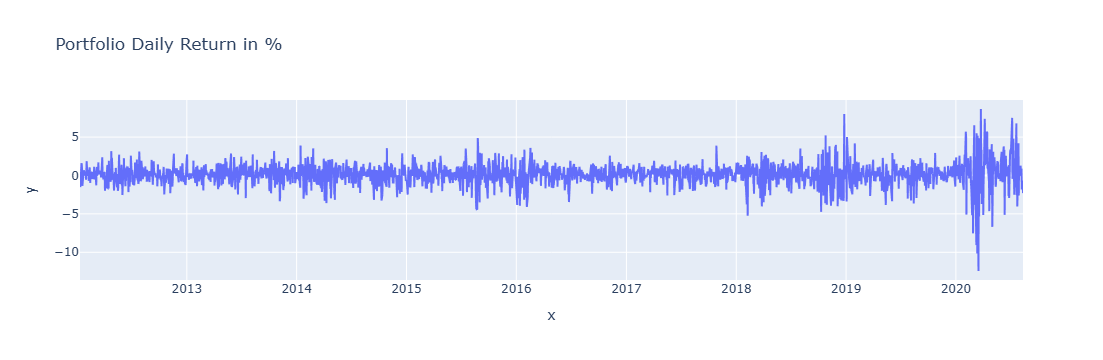

In [31]:
# Plot the portfolio daily return using plotly express

fig = px.line(x = df_portfolio['Date'], y= df_portfolio['Daily Return in %']   , title = "Portfolio Daily Return in %" )
fig.show()

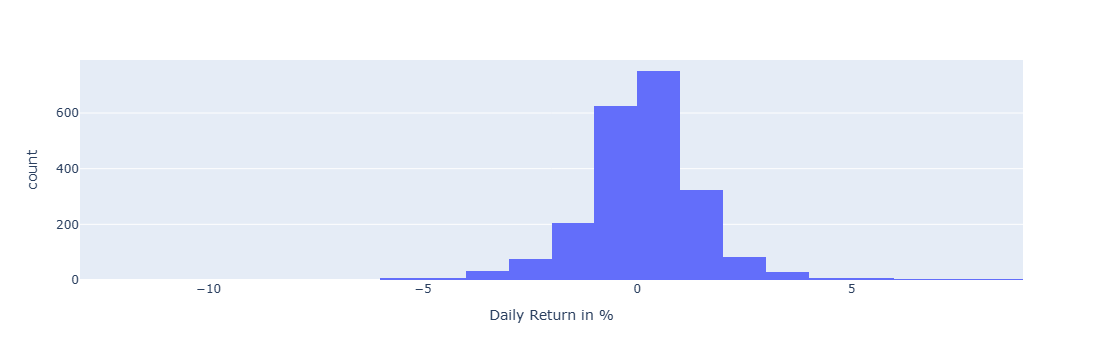

In [32]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = "Daily Return in %")
fig.show()

# UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

# Cumulative Return
Definition:
Cumulative return tells you how much your investment has grown (or shrunk) over a period of time.

Formula:

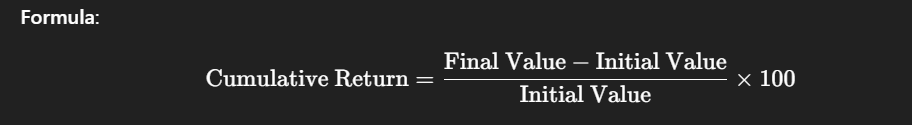


In [39]:
cumulative_return = ((df_portfolio['Total Value'].iloc[-1] - df_portfolio['Total Value'].iloc[0])/ df_portfolio['Total Value'].iloc[0])*100

print(f"The cumulative return for the portfolio in % is {cumulative_return}")

The cumulative return for the portfolio in % is 725.668957781923


The cummulative returns reflects that your portfolio’s total value increased by more than 7 times from its initial value.

It indicates strong capital growth, assuming no major capital inflows or outflows during the period.

However, high returns alone don’t indicate success unless risk is accounted for. That’s where volatility and Sharpe ratio come in.

# Standard Deviation (Volatility)
Definition:
It measures how much the returns of a stock or portfolio vary over time. High standard deviation means the returns fluctuate a lot — i.e., it's riskier.

In [42]:
df_std = df_portfolio['Daily Return in %'].std()

print(f"The standard deviation of portfolio is {df_std}")

The standard deviation of portfolio is 1.449482203190913


In [43]:
#Let's calculate average daily return

Average_Daily_Return = df_portfolio['Daily Return in %'].mean()

print(f"The average daily return of portfolio is {Average_Daily_Return}")

The average daily return of portfolio is 0.10841678379791934


# Sharpe Ratio
Definition:
It tells you how much extra return you are getting for each unit of risk. Higher Sharpe = better risk-adjusted return.

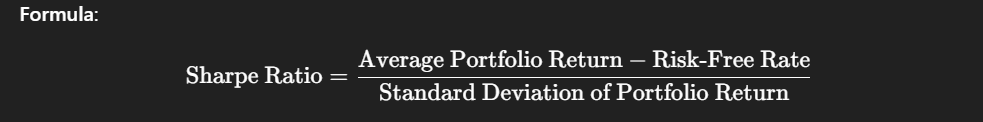

In [44]:
#Assume risk free rate is zero

Sharpe_Ratio = Average_Daily_Return / df_std

print(f"The sharpe ratio of portfolio is {Sharpe_Ratio}")

The sharpe ratio of portfolio is 0.07479690579108107


There are typically 252 trading days in a year.

Here's how it's calculated:
365 days in a year

Subtract weekends: 52 weeks × 2 = 104 days

Subtract around 9–10 public holidays (U.S. market standard)

365 - 104 - ~9 ≈ 252

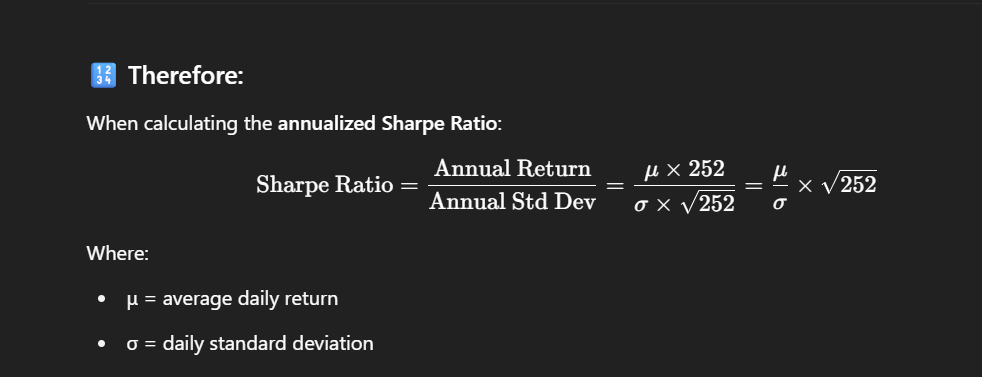

In [47]:
#Annualized Sharpe Ratio

Sharpe_Ratio*(np.sqrt(252))

np.float64(1.1873640693619645)

**Other Annualized Metrics**

In [49]:
# Annualized Return
annualized_return = df_portfolio['Daily Return in %'].mean() * 252

# Annualized Volatility
annualized_volatility = df_portfolio['Daily Return in %'].std() * np.sqrt(252)

print(f"Annualized Return: {annualized_return}%")
print(f"Annualized Volatility (Standard Deviation): {annualized_volatility}%")


Annualized Return: 27.321029517075676%
Annualized Volatility (Standard Deviation): 23.009816636742897%


Annualized Volatility: 23.01%

This indicates moderate risk. It's not extremely volatile (like crypto or high-growth tech stocks which can have 50%+), but not ultra-stable like bonds or mature blue-chip stocks (~10%-15%).

You’re taking a healthy amount of risk, but it's not excessive given the return.

Annualized Sharpe Ratio: 1.19

A Sharpe ratio above 1 is considered good.

Your portfolio is delivering solid excess returns per unit of risk.

The value 1.19 indicates that the reward-to-risk ratio is favorable.

Many institutional portfolios aim for Sharpe ratios between 1 and 2, so you're in a professionally acceptable range.

Let's deduce correlation and covariance matrix to understand asset correlations to analyze diversification.

In [55]:

# Correlation matrix
correlation_matrix = df_portfolio.drop(columns = ['Date', 'Total Value', 'Daily Return', 'Daily Return in %']).corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
           AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
AAPL   1.000000  0.650275 -0.208947  0.390912  0.938721 -0.726157  0.844056   
BA     0.650275  1.000000 -0.138619  0.746731  0.772300 -0.636949  0.333445   
T     -0.208947 -0.138619  1.000000  0.252347 -0.243089  0.202868 -0.194363   
MGM    0.390912  0.746731  0.252347  1.000000  0.468135 -0.479060  0.271630   
AMZN   0.938721  0.772300 -0.243089  0.468135  1.000000 -0.772448  0.760451   
IBM   -0.726157 -0.636949  0.202868 -0.479060 -0.772448  1.000000 -0.610686   
TSLA   0.844056  0.333445 -0.194363  0.271630  0.760451 -0.610686  1.000000   
GOOG   0.910145  0.822399 -0.083084  0.653775  0.957678 -0.813388  0.735988   
sp500  0.892584  0.857329 -0.056531  0.713081  0.923259 -0.795667  0.704308   

           GOOG     sp500  
AAPL   0.910145  0.892584  
BA     0.822399  0.857329  
T     -0.083084 -0.056531  
MGM    0.653775  0.713081  
AMZN   0.957678  0.923259  
IBM   -0.813388 -0.79

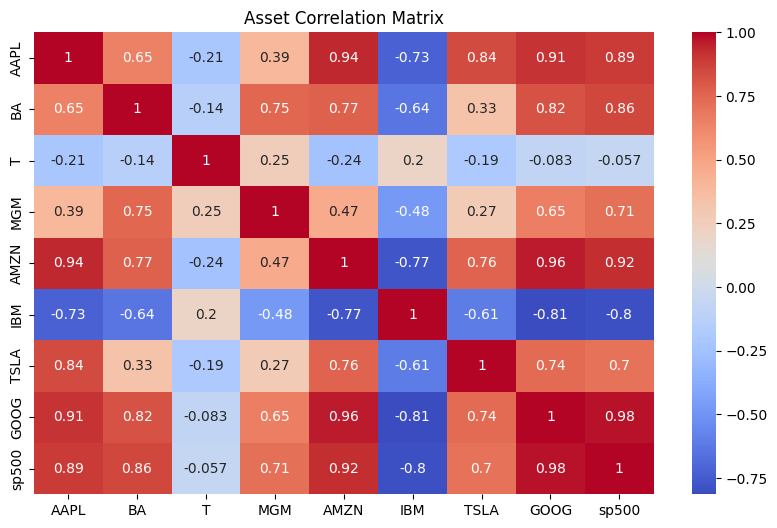

In [57]:
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Asset Correlation Matrix")
plt.show()

The correlation matrix provides important insights into how the assets in the portfolio move in relation to each other.

In [53]:

# Covariance matrix
covariance_matrix = df_portfolio.drop(columns = ['Date', 'Total Value', 'Daily Return', 'Daily Return in %']).cov()
print("\nCovariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
               AAPL            BA             T           MGM          AMZN  \
AAPL   1.651133e+10  1.384668e+10 -1.721788e+07  1.046084e+09  6.934232e+10   
BA     1.384668e+10  2.746089e+10 -1.473102e+07  2.577025e+09  7.357232e+10   
T     -1.721788e+07 -1.473102e+07  4.112478e+05  3.370133e+06 -8.961649e+07   
MGM    1.046084e+09  2.577025e+09  3.370133e+06  4.337044e+08  5.604533e+09   
AMZN   6.934232e+10  7.357232e+10 -8.961649e+07  5.604533e+09  3.304776e+11   
IBM   -2.329805e+09 -2.635482e+09  3.248349e+06 -2.491066e+08 -1.108763e+10   
TSLA   5.258739e+10  2.679178e+10 -6.043457e+07  2.742800e+09  2.119638e+11   
GOOG   2.356849e+10  2.746440e+10 -1.073746e+07  2.743818e+09  1.109483e+11   
sp500  7.259213e+09  8.991957e+09 -2.294518e+06  9.399074e+08  3.359261e+10   

                IBM          TSLA          GOOG         sp500  
AAPL  -2.329805e+09  5.258739e+10  2.356849e+10  7.259213e+09  
BA    -2.635482e+09  2.679178e+10  2.746440e+10  8.991957e+09

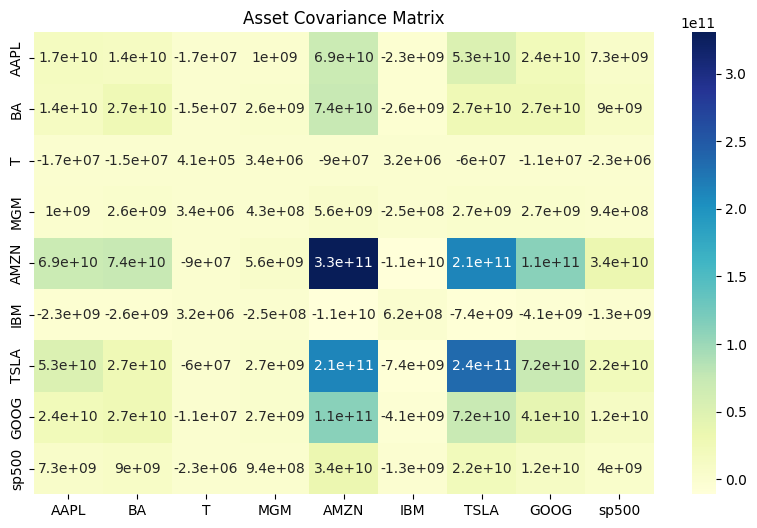

In [58]:
#Let's draw a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='YlGnBu')
plt.title("Asset Covariance Matrix")
plt.show()